In [2]:
import pandas as pd
from scipy.stats import combine_pvalues

# Load your file
file_path = r"C:\Users\maliz\thesa\UKbiobank\data\result_singleton\filter_1_percent\mutual\mutual.csv"
df = pd.read_csv(file_path)

# P-value columns to combine
pval_cols = [
    'p-value_lof_combined',
    'p-value_missense_combined',
    'p-value_lof_missense_combined_combined'
]

# Fisher combination
def fisher_method(row):
    # Keep valid p-values
    pvals = [row[col] for col in pval_cols if pd.notnull(row[col]) and 0 < row[col] <= 1]
    if len(pvals) < 2:
        return None
    # The second returned value is the combined p-value
    _, combined_p = combine_pvalues(pvals, method='fisher')
    return combined_p

# Apply to each row
df['p_value_fisher_combined'] = df.apply(fisher_method, axis=1)

# Check results
print(df[['gene_1', 'gene_2', 'p_value_fisher_combined']].head())

# Save
output_path = r"C:\Users\maliz\thesa\UKbiobank\data\result_singleton\filter_1_percent\mutual\with_fisher_pvalue.csv"
df.to_csv(output_path, index=False)
print(f"✅ Saved combined file to: {output_path}")


            gene_1           gene_2  p_value_fisher_combined
0  ENSG00000005810  ENSG00000155657                 0.195345
1  ENSG00000007174  ENSG00000118997                 0.534209
2  ENSG00000007174  ENSG00000155657                 0.227901
3  ENSG00000007174  ENSG00000181143                 0.838769
4  ENSG00000039139  ENSG00000196126                 0.796132
✅ Saved combined file to: C:\Users\maliz\thesa\UKbiobank\data\result_singleton\filter_1_percent\mutual\with_fisher_pvalue.csv


In [3]:
import pandas as pd
from scipy.stats import combine_pvalues
from statsmodels.stats.multitest import multipletests

# Load your file
file_path = r"C:\Users\maliz\thesa\UKbiobank\data\result_singleton\filter_1_percent\mutual\mutual.csv"
df = pd.read_csv(file_path)

# P-value columns to combine
pval_cols = [
    'p-value_lof_combined',
    'p-value_missense_combined',
    'p-value_lof_missense_combined_combined'
]

# Fisher combination
def fisher_method(row):
    pvals = [row[col] for col in pval_cols if pd.notnull(row[col]) and 0 < row[col] <= 1]
    if len(pvals) < 2:
        return None
    _, combined_p = combine_pvalues(pvals, method='fisher')
    return combined_p

# Apply Fisher's method
df['p_value_fisher_combined'] = df.apply(fisher_method, axis=1)

# Remove NaNs for FDR calculation
valid_pvals = df['p_value_fisher_combined'].dropna()

# Calculate FDR (Benjamini-Hochberg)
_, qvals, _, _ = multipletests(valid_pvals, alpha=0.05, method='fdr_bh')

# Assign back to the DataFrame
df.loc[valid_pvals.index, 'fdr_bh'] = qvals

# Preview
print(df[['gene_1', 'gene_2', 'p_value_fisher_combined', 'fdr_bh']].head())

# Save the results
output_path = r"C:\Users\maliz\thesa\UKbiobank\data\result_singleton\filter_1_percent\mutual\with_fisher_pvalue_fdr.csv"
df


            gene_1           gene_2  p_value_fisher_combined    fdr_bh
0  ENSG00000005810  ENSG00000155657                 0.195345  0.994333
1  ENSG00000007174  ENSG00000118997                 0.534209  0.994333
2  ENSG00000007174  ENSG00000155657                 0.227901  0.994333
3  ENSG00000007174  ENSG00000181143                 0.838769  0.994333
4  ENSG00000039139  ENSG00000196126                 0.796132  0.994333


,gene_1,gene_2,lof_1_x_combined,lof_singleton_1_x_combined,lof_2_x_combined,lof_singleton_2_x_combined,expected_both_lof_combined,both_lof_combined,p-value_lof_combined,missense_1_x_combined,...,lof_singleton_1_y_combined,missense_2_y_combined,missense_singleton_2_y_combined,lof_2_y_combined,lof_singleton_2_y_combined,expected_both_lof_missense_combined_combined,both_lof_missense_combined_combined,p-value_lof_missense_combined_combined,p_value_fisher_combined,fdr_bh
0,ENSG00000005810,ENSG00000155657,4457,48,16034,586,8.918273,6.0,0.214327,2182,...,48,6662,115,16034,586,18.564762,15.0,0.244401,0.195345,0.994333
1,ENSG00000007174,ENSG00000118997,4871,105,12844,133,5.265518,2.0,0.103997,8378,...,105,24645,323,12844,133,19.701468,29.0,0.981674,0.534209,0.994333
2,ENSG00000007174,ENSG00000155657,4871,105,16034,586,11.968564,7.0,0.090887,8378,...,105,6662,115,16034,586,23.604041,22.0,0.422974,0.227901,0.994333
3,ENSG00000007174,ENSG00000181143,4871,105,5866,300,5.478535,4.0,0.360872,8378,...,105,11205,110,5866,300,13.319476,15.0,0.734679,0.838769,0.994333
4,ENSG00000039139,ENSG00000196126,2249,103,23441,1,6.373787,6.0,0.546489,11790,...,103,7761,4,23441,1,17.120770,16.0,0.456153,0.796132,0.994333
5,ENSG00000039139,ENSG00000198502,2249,103,27426,1,7.456331,6.0,0.384151,11790,...,103,8081,2,27426,1,19.767312,21.0,0.663261,0.796523,0.994333
6,ENSG00000048707,ENSG00000196126,337,87,23441,1,5.379563,1.0,0.029409,4578,...,87,7761,4,23441,1,17.403451,16.0,0.429406,0.101171,0.994333
7,ENSG00000048707,ENSG00000198502,337,87,27426,1,6.293945,9.0,0.894358,4578,...,87,8081,2,27426,1,20.151200,20.0,0.545663,0.948702,0.994333
8,ENSG00000100731,ENSG00000181143,6924,40,5866,300,6.097301,3.0,0.142730,2071,...,40,11205,110,5866,300,6.701227,5.0,0.340480,0.359143,0.994333
9,ENSG00000101752,ENSG00000118997,1593,153,12844,133,5.741673,5.0,0.488011,1141,...,153,24645,323,12844,133,15.842843,19.0,0.823070,0.452104,0.994333


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairwise scatter plots
sns.pairplot(
    df[['p-value_lof', 'p-value_missense', 'p-value_lof_missense']],
    kind='scatter',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'none'}
)

plt.suptitle("Correlation between p-values across mutation categories", y=1.02, fontsize=14, fontweight='bold')
plt.show()


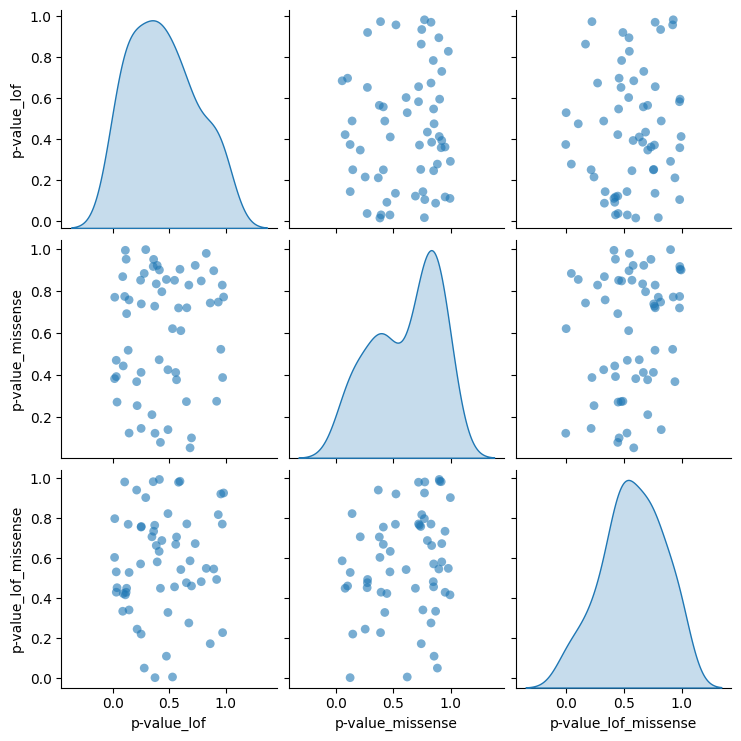

In [9]:
sns.pairplot(
    df[['p-value_lof', 'p-value_missense', 'p-value_lof_missense']],
    kind='scatter',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'none'}
)


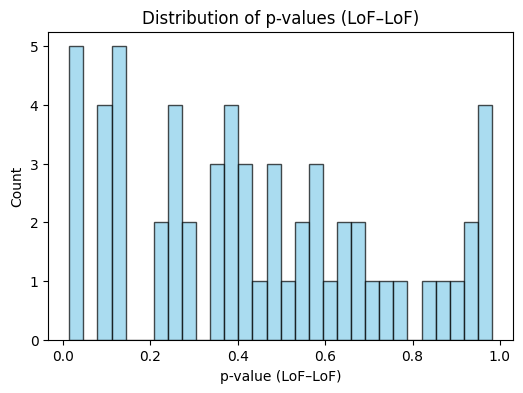

In [11]:
plt.figure(figsize=(6,4))
plt.hist(df['p-value_lof'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('p-value (LoF–LoF)')
plt.ylabel('Count')
plt.title('Distribution of p-values (LoF–LoF)')
plt.show()


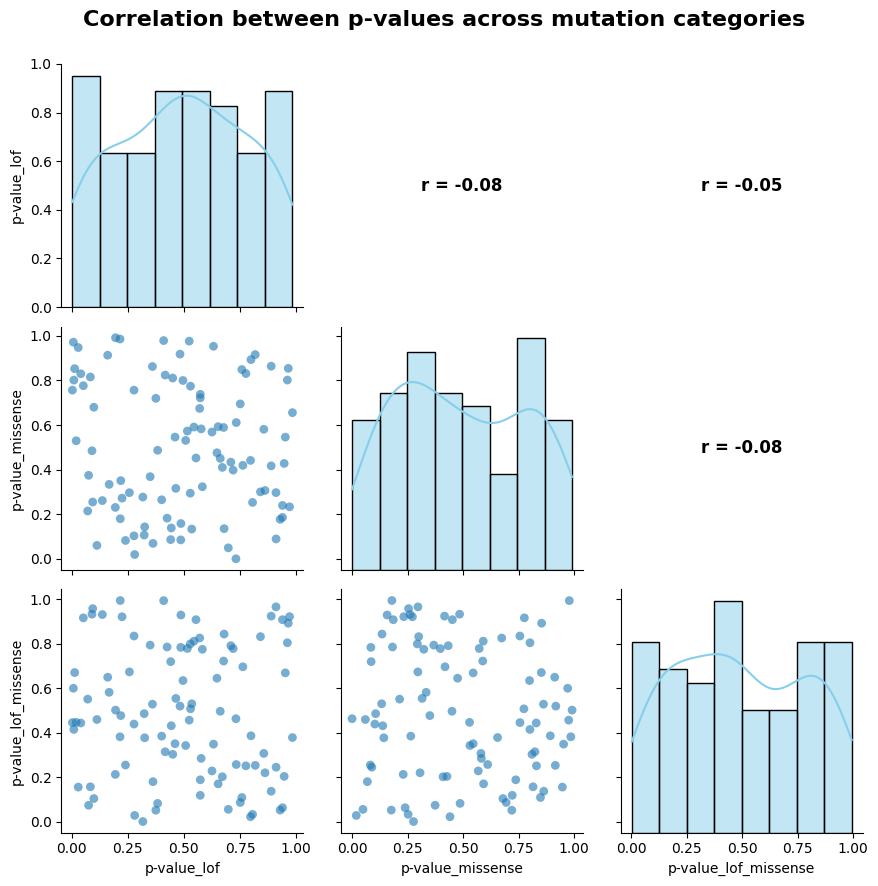

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Example dataframe
df = pd.DataFrame({
    'p-value_lof': np.random.rand(100),
    'p-value_missense': np.random.rand(100),
    'p-value_lof_missense': np.random.rand(100)
})

cols = ['p-value_lof', 'p-value_missense', 'p-value_lof_missense']

# Initialize PairGrid
g = sns.PairGrid(df[cols], diag_sharey=False, height=3)

# Lower triangle: scatterplots
g.map_lower(sns.scatterplot, alpha=0.6, s=40, edgecolor='none')

# Upper triangle: correlation coefficients
def corr_coef(x, y, **kwargs):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center', fontsize=12, fontweight='bold')
    ax.set_axis_off()

g.map_upper(corr_coef)

# Diagonal: histograms / marginals
g.map_diag(sns.histplot, kde=True, color='skyblue')

# Add a main title
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Correlation between p-values across mutation categories", fontsize=16, fontweight='bold')
output_path = r"C:\Users\maliz\thesa\UKbiobank\plots_for_thesis\pvalue_correlation.png"
g.savefig(output_path, bbox_inches='tight')
plt.show()
